# Shania Notebook

# Vax Rates TX Case Study

## Cleaning

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [7]:
url = 'https://data.cdc.gov/resource/8xkx-amqh.json?$select=Date,Recip_State,Administered_Dose1_Recip,Series_Complete_Yes&$where=Date%3E=%222020-12-01%22AND%20Date%3C%222021-12-30%22AND%20Recip_State=%27TX%27&$limit=105000&$offset=0'

In [8]:
res = requests.get(url)

In [9]:
res.status_code

200

In [10]:
data = res.json()

In [11]:
df_vax = pd.DataFrame(data)
df_vax.head()

,Date,Recip_State,Administered_Dose1_Recip,Series_Complete_Yes
0,2021-12-29T00:00:00.000,TX,40321,34497
1,2021-12-29T00:00:00.000,TX,76998,66265
2,2021-12-29T00:00:00.000,TX,102870,89193
3,2021-12-29T00:00:00.000,TX,593,522
4,2021-12-29T00:00:00.000,TX,15891,13870


In [12]:
df_vax.shape

(97097, 4)

Dates Range from 12/13/2020-12/29/2020

In [13]:
df_vax.sort_values(by='Date')

,Date,Recip_State,Administered_Dose1_Recip,Series_Complete_Yes
97096,2020-12-13T00:00:00.000,TX,0,0
96934,2020-12-13T00:00:00.000,TX,0,0
96933,2020-12-13T00:00:00.000,TX,0,0
96932,2020-12-13T00:00:00.000,TX,0,0
96931,2020-12-13T00:00:00.000,TX,0,0
...,...,...,...,...
163,2021-12-29T00:00:00.000,TX,16862,14918
162,2021-12-29T00:00:00.000,TX,67621,57885
161,2021-12-29T00:00:00.000,TX,139715,120538
127,2021-12-29T00:00:00.000,TX,35332,29296


In [14]:
df_vax.isna().sum()

Date                        0
Recip_State                 0
Administered_Dose1_Recip    0
Series_Complete_Yes         0
dtype: int64

In [15]:
df_vax.columns = df_vax.columns.str.lower()

In [16]:
df_vax.dtypes

date                        object
recip_state                 object
administered_dose1_recip    object
series_complete_yes         object
dtype: object

In [17]:
df_vax.head()

,date,recip_state,administered_dose1_recip,series_complete_yes
0,2021-12-29T00:00:00.000,TX,40321,34497
1,2021-12-29T00:00:00.000,TX,76998,66265
2,2021-12-29T00:00:00.000,TX,102870,89193
3,2021-12-29T00:00:00.000,TX,593,522
4,2021-12-29T00:00:00.000,TX,15891,13870


Set Index to date time

In [18]:
df_vax['date'] = pd.to_datetime(df_vax['date'])

In [19]:
df_vax['series_complete_yes'] = df_vax['series_complete_yes'].astype('int')

In [20]:
df_vax['administered_dose1_recip'] = df_vax['administered_dose1_recip'].astype('int')

In [21]:
df_vax

,date,recip_state,administered_dose1_recip,series_complete_yes
0,2021-12-29,TX,40321,34497
1,2021-12-29,TX,76998,66265
2,2021-12-29,TX,102870,89193
3,2021-12-29,TX,593,522
4,2021-12-29,TX,15891,13870
...,...,...,...,...
97092,2020-12-13,TX,0,0
97093,2020-12-13,TX,0,0
97094,2020-12-13,TX,0,0
97095,2020-12-13,TX,0,0


In [22]:
df_vax.dtypes

date                        datetime64[ns]
recip_state                         object
administered_dose1_recip             int64
series_complete_yes                  int64
dtype: object

In [23]:
df_vax.set_index('date', inplace=True)

In [24]:
df_vax.head()

,recip_state,administered_dose1_recip,series_complete_yes
date,,,
2021-12-29,TX,40321,34497
2021-12-29,TX,76998,66265
2021-12-29,TX,102870,89193
2021-12-29,TX,593,522
2021-12-29,TX,15891,13870


In [25]:
df_vax=df_vax.groupby('date').sum()
#groupby changes the index to whatever you're grouping by

In [26]:
df_vax['recip_state'] = 'TX'

In [27]:
df_vax

,administered_dose1_recip,series_complete_yes,recip_state
date,,,
2020-12-13,0,0,TX
2020-12-14,0,0,TX
2020-12-15,0,0,TX
2020-12-16,0,0,TX
2020-12-17,0,0,TX
...,...,...,...
2021-12-25,19225984,16424025,TX
2021-12-26,19226384,16424081,TX
2021-12-27,19282639,16462911,TX


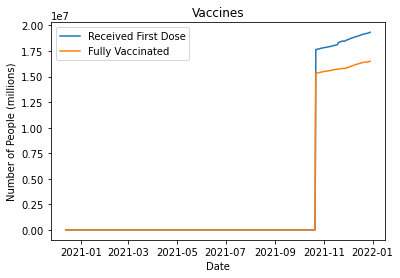

In [31]:
plt.figure()
plt.title('Vaccines')
plt.xlabel('Date')
plt.ylabel('Number of People (millions)')
plt.plot(df_vax['administered_dose1_recip'], label='Received First Dose')
plt.plot(df_vax['series_complete_yes'], label='Fully Vaccinated')
plt.legend()
plt.tight_layout;


I see about half a million more people have only had their first shot at the end of this series. That's expected however as there is a two week gap between shots.

In [32]:
df_vax.to_csv('../data/shaniaaaaaa/TX_vax_121320_122921.csv')

# Case Rates TX Case Study

In [ ]:
url_cases = 'https://data.cdc.gov/resource/9mfq-cb36.json?$select=submission_date,state,tot_cases&$where=submission_date%3E=%222020-03-01%22AND%20submission_date%3C%222021-12-30%22AND%20state=%27TX%27&$limit=105000&$offset=0'

In [ ]:
res_cases = requests.get(url_cases_31)
res_cases.status_code

In [ ]:
data_cases = res_cases.json()

In [ ]:
df_cases_tx = pd.DataFrame(data_cases)
df_cases.head()

In [ ]:
df_cases_tx.shape

In [ ]:
df_cases_tx.sort_values(by='submission_date')

In [ ]:
df_cases_tx['submission_date'] = pd.to_datetime(df_cases['submission_date'])

In [ ]:
df_cases_tx.set_index('submission_date', inplace=True)

In [ ]:
df_cases_tx.sort_index(inplace=True)

In [ ]:
df_cases_tx.dtypes

In [ ]:
df_cases_tx['tot_cases']=df_cases_tx['tot_cases'].astype(int)

In [ ]:
df_cases_tx

# EDA TX

In [ ]:
plt.figure(figsize=(12,10))
plt.tight_layout()
plt.plot(df_cases_tx['tot_cases'])
plt.xlabel('Dates')
plt.ylabel('cases in millions')
plt.yticks(range(0,5_000_000,100_000));
#plt.xticks(['2021-01','2021-02', '2022-01']);

There are periods of more dramatic periods of increas, but an overall upwards and right trend

In [ ]:
plt.figure(figsize=(12,10))
plt.hist(df_cases['tot_cases'],bins=100)
plt.xlabel('Cases in Hundred Millions')
plt.ylabel('Frequency')
#plt.xticks(range(0,5_000_000,100_000));

# National Case Numbers

In [35]:
df_cases = pd.read_csv('../data/shaniaaaaaa/all_cases_infected.csv', )
df_cases

,submission_date,state,tot_cases,I_actual
0,2020-01-23,AK,0,0.0
1,2020-01-24,AK,0,0.0
2,2020-01-25,AK,0,0.0
3,2020-01-26,AK,0,0.0
4,2020-01-27,AK,0,0.0
...,...,...,...,...
36052,2021-12-25,WY,114242,1380.0
36053,2021-12-26,WY,114242,1380.0
36054,2021-12-27,WY,114624,1547.0
36055,2021-12-28,WY,114917,1684.0


In [36]:
df_cases.set_index(df_cases['submission_date'], inplace=True)

In [37]:
df_cases.drop(columns=['submission_date'], inplace=True)

In [38]:
df_cases.to_csv('../data/shaniaaaaaa/all_cases_infected.csv', index=False)

# Arima Modeling

In [41]:
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA

In [44]:
states = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
#ADF Fuller test to test for stationarity

def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [45]:
df_WY= df_cases[df_cases['state']=='WY']

In [65]:
y_train, y_test = train_test_split(df_AK['I_actual'], test_size=.1, shuffle=False)

Attempting to .diff all of the states to make them stationary.

Finalized with .diff 3 times as it makes every state have a p value of <.01

In [47]:

for state in states:
    p_values = []
    df = df_cases[df_cases['state']==state]
    y_train, y_test = train_test_split(df['I_actual'], test_size=.1, shuffle=False)
    p=interpret_dftest(adfuller(df['I_actual'].diff().diff().diff().dropna()))['p-value']
    p_values.append(p)
    #print(p_values)

Creating a dictionary to store all of the 50 states best orders (p,d,q). The for loop below this calculates the best p d q values for each state

In [93]:
# Using Dictionary comprehension
state_orders = {key: None for key in states}
print(state_orders)

{'AK': None, 'AL': None, 'AR': None, 'AZ': None, 'CA': None, 'CO': None, 'CT': None, 'DC': None, 'DE': None, 'FL': None, 'GA': None, 'HI': None, 'IA': None, 'ID': None, 'IL': None, 'IN': None, 'KS': None, 'KY': None, 'LA': None, 'MA': None, 'MD': None, 'ME': None, 'MI': None, 'MN': None, 'MO': None, 'MS': None, 'MT': None, 'NC': None, 'ND': None, 'NE': None, 'NH': None, 'NJ': None, 'NM': None, 'NV': None, 'NY': None, 'OH': None, 'OK': None, 'OR': None, 'PA': None, 'RI': None, 'SC': None, 'SD': None, 'TN': None, 'TX': None, 'UT': None, 'VA': None, 'VT': None, 'WA': None, 'WI': None, 'WV': None, 'WY': None}


In [103]:
state_orders['AK'] = 3,3,4
state_orders['AR'] = 2,3,4
state_orders['AL'] = 2,3,4
state_orders['AZ'] = 4,3,3
state_orders['CA'] = 4,3,4
state_orders['CO'] = 2,3,4
state_orders['CT'] = 4,3,3
state_orders['DC'] = 4,3,4
state_orders['DE'] = 4,3,4
state_orders['FL'] = 2,3,4
state_orders['GA'] = 2,3,3
state_orders['HI'] = 4,3,4
state_orders['IA'] = 4,3,3
state_orders['ID'] = 3,3,4
state_orders['IL'] = 2,3,4
state_orders['IN'] = 4,3,4
state_orders['KS'] = 4,3,4
state_orders['KY'] = 2,3,4
state_orders['LA'] = 3,3,4
state_orders['MA'] = 4,3,4
state_orders['MD'] = 2,3,4
state_orders['MS'] = 1,3,3
state_orders['MT'] = 2,3,4
state_orders['NC'] = 4,3,4
state_orders['ND'] = 2,3,4
state_orders['NE'] = 3,3,4
state_orders['NH'] = 4,3,4
state_orders['NJ'] = 2,3,4
state_orders['NM'] = 4,3,4
state_orders['NV'] = 2,3,4
state_orders['NY'] = 3,3,4
state_orders['OH'] = 4,3,3
state_orders['OK'] = 3,3,2
state_orders['OR'] = 2,3,4
state_orders['PA'] = 4,3,4
state_orders['RI'] = 4,3,4
state_orders['SC'] = 3,3,3
state_orders['SD'] = 3,3,4
state_orders['TN'] = 3,3,3
state_orders['TX'] = 4,3,4
state_orders['UT'] = 4,3,4
state_orders['VA'] = 3,3,3
state_orders['VT'] = 4,3,4
state_orders['WA'] = 4,3,4
state_orders['WI'] = 2,3,4
state_orders['WV'] = 3,3,4
state_orders['WY'] = 4,3,4
state_orders['MI'] = 4,3,4
state_orders['ME'] = 3,3,3
state_orders['MN'] = 1,3,3
state_orders['MO'] = 3,3,4

In [102]:
#find best p and q, 

for state in states:
    print(f' The state we are currently doing is {state}.')
    p_values = []
    df = df_cases[df_cases['state']==state]
    y_train, y_test = train_test_split(df['I_actual'], test_size=.1, shuffle=False)
    p=interpret_dftest(adfuller(df['I_actual'].diff().diff().diff().dropna()))['p-value']
    p_values.append(p)
    
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')

        best_aic = 9999999
        best_p = 0
        best_q = 0

        # Use nested for loop to iterate over values of p and q.
        for p in range(5):
            for q in range(5):

                # Insert try and except statements.
                try:

                    # Fitting an ARIMA(p, 1, q) model.
                    #print(f'Attempting ARIMA({p}, 3, {q})')

                    # Instantiate ARIMA model.
                    arima = ARIMA(endog=y_train, order=(p, 3, q))


                    # Fit ARIMA model.
                    model = arima.fit()

                    # Print out AIC for ARIMA(p, 1, q) model.
                    #print(f'The AIC for ARIMA({p},3,{q}) is: {model.aic}')

                    # Is my current model's AIC better than our best_aic?
                    if model.aic < best_aic:

                        # If so, let's overwrite best_aic, best_p, and best_q.
                        best_aic = model.aic
                        best_p = p
                        best_q = q

                except:
                    #print('foo!')
                    pass
        print()
#        print('MODEL FINISHED!')
        print(f'Our model that minimizes AIC on the training data is the ARIMA({best_p},3,{best_q}).')
        print(f'This model has an AIC of {best_aic}.')
        print()
        print()

 The state we are currently doing is AK.

Our model that minimizes AIC on the training data is the ARIMA(2,2,4).
This model has an AIC of 7434.634760565735.


 The state we are currently doing is AL.

Our model that minimizes AIC on the training data is the ARIMA(2,2,4).
This model has an AIC of 10052.938050938916.


 The state we are currently doing is AR.

Our model that minimizes AIC on the training data is the ARIMA(2,2,4).
This model has an AIC of 9462.990002093897.


 The state we are currently doing is AZ.

Our model that minimizes AIC on the training data is the ARIMA(4,2,3).
This model has an AIC of 10920.17497042492.


 The state we are currently doing is CA.

Our model that minimizes AIC on the training data is the ARIMA(4,2,4).
This model has an AIC of 13473.319547500203.


 The state we are currently doing is CO.

Our model that minimizes AIC on the training data is the ARIMA(2,2,4).
This model has an AIC of 9236.871475637727.


 The state we are currently doing is CT.

Ou

In [49]:
#run ARIMA to predict next day

# with warnings.catch_warnings():
#     warnings.simplefilter('ignore')
#     y = df_state['I_actual'].copy()
#     I = pd.Series(np.zeros((len(df_state),)))

#     p = 3
#     I[0:p] = df_state['I_actual'].copy()[0:p]
    
#     for day in range(p+2,len(df_state)-1 ): # IDK why this will not work for p+1 or p
#         print(day)
#         arima = ARIMA( endog = y[y.index[0:day]], order =(3,2,4) )  #order = best p, d,best q
#         print(arima)
#         model = arima.fit()
#         I[day+1] = model.predict( start = y.index[day+1], end = y.index[day+1]   )
#         df_state['I_arima_preds'] = list(I) # This code adds the ARIMA predictions to the dataframe
#         break;

# from scipy import linalg
      
# with warnings.catch_warnings():
#     warnings.simplefilter('ignore')
#     y = df_cases[df_cases['state']=='AK'].copy()
#     I = pd.Series(np.zeros((len(df_cases[df_cases['state']=='AK']),)))

#     p = 3
#     I[0:p] = y[0:p]

#     for day in range(100,len(df_cases[df_cases['state']=='AK'])-1 ):
#         arima = ARIMA( endog = y[y.index[0:day]], order =(3,3,4) )      #3,2,0
#         model = arima.fit()
#         I[day+1] = model.predict( start = y.index[day+1], end = y.index[day+1]   )
#     df_oh['I_arima_preds'] = list(I) # This code adds the ARIMA predictions to the dataframe


Attempting to run these next day ARIMA models was unsuccessful via my method. However, David's notebook creates predictions using a blanket p,d,q value for every state. If given more time, I would like to reattempt this method and see what predictions look like.

# Herd Immunity?

In [2]:
states = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

In [3]:
df_pop = pd.read_csv('../data/afolabi/population_usa_2019.csv')
df_infec= pd.read_csv('../data/afolabi/all_cases_infected.csv')

In [4]:
df_pop.drop(columns=['name'], inplace=True)

This df has population data for every state from the US census

In [5]:
df_pop.head()

,state,population 2019
0,AK,731545
1,AL,4903185
2,AR,3017804
3,AZ,7278717
4,CA,39512223


This df shows how many active infections on a given day in the I_actual column

In [6]:
df_infec.head()

,submission_date,state,tot_cases,I_actual
0,2020-01-23,AK,0,0.0
1,2020-01-24,AK,0,0.0
2,2020-01-25,AK,0,0.0
3,2020-01-26,AK,0,0.0
4,2020-01-27,AK,0,0.0


In [7]:
df_immunity = pd.merge(left=df_infec, right=df_pop, how='left', on=['state'])

In [8]:
df_immunity

,submission_date,state,tot_cases,I_actual,population 2019
0,2020-01-23,AK,0,0.0,731545
1,2020-01-24,AK,0,0.0,731545
2,2020-01-25,AK,0,0.0,731545
3,2020-01-26,AK,0,0.0,731545
4,2020-01-27,AK,0,0.0,731545
...,...,...,...,...,...
36052,2021-12-25,WY,114242,1380.0,578759
36053,2021-12-26,WY,114242,1380.0,578759
36054,2021-12-27,WY,114624,1547.0,578759
36055,2021-12-28,WY,114917,1684.0,578759


 Creating df_immunity['immun_perc'] to show what percent of people are "immune" to covid due to being infected already.

In [9]:
df_immunity['immun_perc'] = df_immunity['tot_cases']/df_immunity['population 2019']
df_immunity

,submission_date,state,tot_cases,I_actual,population 2019,immun_perc
0,2020-01-23,AK,0,0.0,731545,0.000000
1,2020-01-24,AK,0,0.0,731545,0.000000
2,2020-01-25,AK,0,0.0,731545,0.000000
3,2020-01-26,AK,0,0.0,731545,0.000000
4,2020-01-27,AK,0,0.0,731545,0.000000
...,...,...,...,...,...,...
36052,2021-12-25,WY,114242,1380.0,578759,0.197391
36053,2021-12-26,WY,114242,1380.0,578759,0.197391
36054,2021-12-27,WY,114624,1547.0,578759,0.198051
36055,2021-12-28,WY,114917,1684.0,578759,0.198558


In [10]:
df_vax= pd.read_csv('../data/all_state_vax.csv')

df_vax.set_index('Date', inplace=True)

df_vax.sort_index(inplace=True)

The beloe for loop creates a df that shows how many people were given their final vaccinations on each day.

In [11]:
state_abbrev = [ 'AK_V', 'AL_V', 'AR_V', 'AZ_V', 'CA_V', 'CO_V', 'CT_V', 'DC_V', 'DE_V', 'FL_V', 'GA_V',
           'IA_V', 'ID_V', 'IL_V', 'IN_V', 'KS_V', 'KY_V', 'LA_V', 'MA_V', 'MD_V', 'ME_V',
           'MI_V', 'MN_V', 'MO_V', 'MS_V', 'MT_V', 'NC_V', 'ND_V', 'NE_V', 'NH_V', 'NJ_V', 'NM_V',
           'NV_V', 'NY_V', 'OH_V', 'OK_V', 'OR_V', 'PA_V', 'RI_V', 'SC_V', 'SD_V', 'TN_V', 'TX_V',
           'UT_V', 'VA_V', 'VT_V', 'WA_V', 'WI_V', 'WV_V', 'WY_V']

df_list = []

for abbrev in state_abbrev:
    state_cols = []
    for col in list(df_vax.columns):
        if abbrev in col:
            state_cols.append(col)
#     print(state_cols)
    df = df_vax[state_cols].copy()
#     print(df)
    df.columns = ['Vax']
    df['state'] = abbrev[:2]
    df_list.append(df)
df_complete = pd.concat(df_list)

df_complete

,Vax,state
Date,,
2020-12-13,0.0,AK
2020-12-14,0.0,AK
2020-12-15,0.0,AK
2020-12-16,0.0,AK
2020-12-17,0.0,AK
...,...,...
2022-03-16,70.0,WY
2022-03-17,90.0,WY
2022-03-18,88.0,WY


In [12]:

df_immunity = pd.merge(left=df_immunity, right=df_complete, left_on=['submission_date', 'state'], right_on=[df_complete.index, 'state'],how='left')
# with pd.option_context('display.max_rows', 2000):
#     display(test)
df_immunity.tail()

,submission_date,state,tot_cases,I_actual,population 2019,immun_perc,Vax
36052,2021-12-25,WY,114242,1380.0,578759,0.197391,9.0
36053,2021-12-26,WY,114242,1380.0,578759,0.197391,1.0
36054,2021-12-27,WY,114624,1547.0,578759,0.198051,4.0
36055,2021-12-28,WY,114917,1684.0,578759,0.198558,479.0
36056,2021-12-29,WY,115242,1883.0,578759,0.199119,261.0


In [13]:
df_immunity['rolling_vax'] = df_immunity['Vax']
df_immunity.tail()

,submission_date,state,tot_cases,I_actual,population 2019,immun_perc,Vax,rolling_vax
36052,2021-12-25,WY,114242,1380.0,578759,0.197391,9.0,9.0
36053,2021-12-26,WY,114242,1380.0,578759,0.197391,1.0,1.0
36054,2021-12-27,WY,114624,1547.0,578759,0.198051,4.0,4.0
36055,2021-12-28,WY,114917,1684.0,578759,0.198558,479.0,479.0
36056,2021-12-29,WY,115242,1883.0,578759,0.199119,261.0,261.0


Creating a cumulative sum of how many people are fully vaccinated per state

In [14]:
df_list=[]
for state in states:
    df_state = df_immunity[df_immunity['state']==state].copy()
    df_state['rolling_vax']=df_state['rolling_vax'].cumsum()
    df_list.append(df_state)

df_immunity= pd.concat(df_list)

In [15]:
df_immunity

,submission_date,state,tot_cases,I_actual,population 2019,immun_perc,Vax,rolling_vax
0,2020-01-23,AK,0,0.0,731545,0.000000,NaN,NaN
1,2020-01-24,AK,0,0.0,731545,0.000000,NaN,NaN
2,2020-01-25,AK,0,0.0,731545,0.000000,NaN,NaN
3,2020-01-26,AK,0,0.0,731545,0.000000,NaN,NaN
4,2020-01-27,AK,0,0.0,731545,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...
36052,2021-12-25,WY,114242,1380.0,578759,0.197391,9.0,273921.0
36053,2021-12-26,WY,114242,1380.0,578759,0.197391,1.0,273922.0
36054,2021-12-27,WY,114624,1547.0,578759,0.198051,4.0,273926.0
36055,2021-12-28,WY,114917,1684.0,578759,0.198558,479.0,274405.0


Now including the amount of vaccinated individuals in the percentage of immune people

In [16]:
df_list=[]
for state in states:
    df_state = df_immunity[df_immunity['state']==state].copy()
    df_immunity['immun_perc'] =(df_immunity['tot_cases'] + df_immunity['rolling_vax'])/df_immunity['population 2019']
    df_list.append(df_state)

df_immunity= pd.concat(df_list)
df_immunity.tail()

,submission_date,state,tot_cases,I_actual,population 2019,immun_perc,Vax,rolling_vax
36052,2021-12-25,WY,114242,1380.0,578759,0.670682,9.0,273921.0
36053,2021-12-26,WY,114242,1380.0,578759,0.670683,1.0,273922.0
36054,2021-12-27,WY,114624,1547.0,578759,0.671350,4.0,273926.0
36055,2021-12-28,WY,114917,1684.0,578759,0.672684,479.0,274405.0
36056,2021-12-29,WY,115242,1883.0,578759,0.673697,261.0,274666.0


# Binarizing if a state was at herd immunity or not on a given day. 

Herd immunity is defined as when the amount of susceptible people (S) is less than the the value of b/a, which takes into account recovery time (b), transmissibility, and population.

In [17]:
populations = { 'AK':733391,'AL':5024279, 'AR':3011524, 'AZ':7_151_502, 
               'CA': 39_538_223, 'CO':5773714, 'CT':3605944, 'DC':689545, 
               'DE':989948, 'FL':21_538_187, 'GA':10_711_908,
                           #'HI':1_416_324, 
          'IA':3190369, 'ID':1839106, 'IL':12_812_508, 'IN':6785528, 'KS':2937880, 
               'KY':4505836, 'LA':4657757,'MA':7_029_917,'MD':6177224, 
               'ME':1362359,'MI':10_077_331,'MN':5706494,'MO':6154913, 
               'MS':2961279,'MT':1084225, 'NC':10_439_388, 
               'ND':779094, 'NE':1961504, 'NH':1377529,'NJ':9_288_994, 
               'NM':2117522,'NV':3104614, 'NY':20_201_249,'OH':11_799_448, 
               'OK':3959353, 'OR':4237256,'PA':13_002_700,'RI':1097379, 
               'SC':5118425, 'SD':886667, 'TN':6910840, 'TX':29_145_505,
           'UT':3271616, 'VA':8_631_393, 'VT':643077,'WA':7_705_281, 
               'WI':5893718, 'WV':1793716,'WY':576851}

In [19]:
shabang = pd.read_csv('../data/shabang.csv')
shabang.head(1)

,Unnamed: 0,key_0,AK_I,AL_I,AR_I,AZ_I,CA_I,CO_I,CT_I,DC_I,...,VT_I_SIR,VT_S_SIR,WA_I_SIR,WA_S_SIR,WI_I_SIR,WI_S_SIR,WV_I_SIR,WV_S_SIR,WY_I_SIR,WY_S_SIR
0,0,2020-12-13,8890.0,47919.0,29455.0,82489.0,352832.0,62783.0,34180.0,3426.0,...,1436.0,610923.15,40512.0,7320016.95,59902.0,5599032.1,16220.0,1704030.2,6871.0,548008.45


In [20]:
b = 1/14
for key,value in populations.items():
    a = 2.8*b/populations[key]
    #print(a)
    shabang[f'{key}_H_I'] = (shabang[f'{key}_S_SRI'] <= b/a ).astype(int)

In [28]:
shabang

,Unnamed: 0,key_0,AK_I,AL_I,AR_I,AZ_I,CA_I,CO_I,CT_I,DC_I,...,SD_H_I,TN_H_I,TX_H_I,UT_H_I,VA_H_I,VT_H_I,WA_H_I,WI_H_I,WV_H_I,WY_H_I
0,0,2020-12-13,8890.0,47919.0,29455.0,82489.0,352832.0,62783.0,34180.0,3426.0,...,0,0,0,0,0,0,0,0,0,0
1,1,2020-12-14,8811.0,48307.0,29698.0,93473.0,372076.0,61179.0,36697.0,3486.0,...,0,0,0,0,0,0,0,0,0,0
2,2,2020-12-15,8544.0,48487.0,29889.0,87285.0,392181.0,58115.0,36708.0,3654.0,...,0,0,0,0,0,0,0,0,0,0
3,3,2020-12-16,8460.0,49123.0,29983.0,88282.0,425130.0,56753.0,36355.0,3760.0,...,0,0,0,0,0,0,0,0,0,0
4,4,2020-12-17,8042.0,50608.0,30233.0,88657.0,458823.0,53946.0,33925.0,3666.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,377,2021-12-25,1840.0,17087.0,11783.0,41750.0,130944.0,32166.0,35134.0,10863.0,...,1,1,1,1,1,1,1,1,1,1
378,378,2021-12-26,1840.0,18656.0,11987.0,38863.0,130944.0,32166.0,35134.0,10863.0,...,1,1,1,1,1,1,1,1,1,1
379,379,2021-12-27,2263.0,21372.0,12693.0,44113.0,149242.0,38021.0,41895.0,19373.0,...,1,1,1,1,1,1,1,1,1,1
380,380,2021-12-28,2263.0,27050.0,14325.0,43921.0,193197.0,42779.0,44649.0,21093.0,...,1,1,1,1,1,1,1,1,1,1


In [21]:
shabang.iloc[:, -50:].sum()

AK_H_I    127
AL_H_I    101
AR_H_I    124
AZ_H_I    222
CA_H_I    228
CO_H_I    148
CT_H_I    243
DC_H_I    226
DE_H_I    232
FL_H_I    213
GA_H_I    112
IA_H_I    218
ID_H_I      0
IL_H_I    202
IN_H_I    169
KS_H_I    158
KY_H_I    189
LA_H_I    119
MA_H_I    240
MD_H_I    225
ME_H_I    236
MI_H_I    207
MN_H_I    226
MO_H_I    116
MS_H_I    109
MT_H_I     98
NC_H_I    192
ND_H_I     31
NE_H_I    205
NH_H_I    216
NJ_H_I    235
NM_H_I    235
NV_H_I    162
NY_H_I    222
OH_H_I    104
OK_H_I    123
OR_H_I    213
PA_H_I    225
RI_H_I    234
SC_H_I    152
SD_H_I    203
TN_H_I    121
TX_H_I     68
UT_H_I    168
VA_H_I    224
VT_H_I    228
WA_H_I    217
WI_H_I    222
WV_H_I     27
WY_H_I     70
dtype: int64

Filling nans and writing the immun_perc column as a string of percentages

In [23]:
df_immunity['immun_perc'] = df_immunity['immun_perc']*100
df_immunity['immun_perc'] = df_immunity['immun_perc'].round(2)
df_immunity

,submission_date,state,tot_cases,I_actual,population 2019,immun_perc,Vax,rolling_vax
0,2020-01-23,AK,0,0.0,731545,0.00,NaN,NaN
1,2020-01-24,AK,0,0.0,731545,0.00,NaN,NaN
2,2020-01-25,AK,0,0.0,731545,0.00,NaN,NaN
3,2020-01-26,AK,0,0.0,731545,0.00,NaN,NaN
4,2020-01-27,AK,0,0.0,731545,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...
36052,2021-12-25,WY,114242,1380.0,578759,67.07,9.0,273921.0
36053,2021-12-26,WY,114242,1380.0,578759,67.07,1.0,273922.0
36054,2021-12-27,WY,114624,1547.0,578759,67.14,4.0,273926.0
36055,2021-12-28,WY,114917,1684.0,578759,67.27,479.0,274405.0


In [24]:
df_immunity['immun_perc'] = df_immunity['immun_perc'].astype(str)

In [25]:
df_immunity['immun_perc'] = df_immunity['immun_perc'] + '%'

In [26]:
df_immunity=df_immunity.fillna(0)

In [27]:
df_immunity

,submission_date,state,tot_cases,I_actual,population 2019,immun_perc,Vax,rolling_vax
0,2020-01-23,AK,0,0.0,731545,0.0%,0.0,0.0
1,2020-01-24,AK,0,0.0,731545,0.0%,0.0,0.0
2,2020-01-25,AK,0,0.0,731545,0.0%,0.0,0.0
3,2020-01-26,AK,0,0.0,731545,0.0%,0.0,0.0
4,2020-01-27,AK,0,0.0,731545,0.0%,0.0,0.0
...,...,...,...,...,...,...,...,...
36052,2021-12-25,WY,114242,1380.0,578759,67.07%,9.0,273921.0
36053,2021-12-26,WY,114242,1380.0,578759,67.07%,1.0,273922.0
36054,2021-12-27,WY,114624,1547.0,578759,67.14%,4.0,273926.0
36055,2021-12-28,WY,114917,1684.0,578759,67.27%,479.0,274405.0


In [29]:
df_immunity.to_csv('../data/shaniaaaaaa/herd_immunity_and_vax_counts.csv')

In [30]:
shabang.to_csv('../data/shaniaaaaaa/bangaroonie.csv')